In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats.morestats import log
import warnings

# Projeto 6

Douglas Fonseca (douglas.barbosa.fonseca@gmail.com)

Farley Salomão Filho (farleysalf@gmail.com)

Hallynny Barros (hallynnyhenrique01@hotmail.com)

Samira Vidal de Lima (samira.vidal1@gmail.com)

Thalles Correia (thallesrafael2010@gmail.com)

Vinicius Maciel e Souza (v188201@dac.unicamp.br)

In [ ]:
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

# Atividade 1 - Estatística Descritiva

In [ ]:
#Lendo e ajustando o banco de dados
df = pd.read_csv("/content/all_seasons.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
temporadas = {'1996-97':"1996", '1997-98':"1997", '1998-99':"1998", '1999-00':"1999", '2000-01':"2000", '2001-02':"2001",
       '2002-03':"2002", '2003-04':"2003", '2004-05':"2004", '2005-06':"2005", '2006-07':"2006", '2007-08':"2007",
       '2008-09':"2008", '2009-10':"2009", '2010-11':"2010", '2011-12':"2011", '2012-13':"2012", '2013-14':"2013",
       '2014-15':"2014", '2015-16':"2015", '2016-17':"2016", '2017-18':"2017", '2018-19':"2018", '2019-20':"2019",
       '2020-21':"2020", '2021-22':"2021"}
df['season'].replace(temporadas, inplace=True)

In [ ]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996


1. player_name : Nome do jogador
2. team_abbreviation : Nome abreviado do time
3. age : Idade
4. player_height : Altura
5. player_weight : Peso
6. college : Colégio
7. country : País
8. draft_year : Ano que o jogador foi selecionado
9. draft_round : Turno de seleção que o jogador foi selecionado
10. draft_number : Número de seleção 
11. gp : Números de jogos na temporada
12. pts : Número médio de pontos marcados
13. reb : Número médio de rebotes agarrados
14. ast : Número médio de assistências
15. net_rating : Diferencial de pontos por 100 posses, enquanto o jogador está em jogo
16. oreb_pct : Percentual de rebotes ofensivos disponíveis que o jogador agarrou enquanto estava no chão
17. dreb_pct : Percentual de rebotes ofensivos
18. usg_pct : Percentual de jogadas da equipe utilizadas
19. ts_pct : Medida de eficiência dos arremessos do jogador
20. ast_pct : Percentual dos pontos em que o jogador deu assistência 
21. season : Temporada



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12305 non-null  object 
 1   team_abbreviation  12305 non-null  object 
 2   age                12305 non-null  float64
 3   player_height      12305 non-null  float64
 4   player_weight      12305 non-null  float64
 5   college            12305 non-null  object 
 6   country            12305 non-null  object 
 7   draft_year         12305 non-null  object 
 8   draft_round        12305 non-null  object 
 9   draft_number       12305 non-null  object 
 10  gp                 12305 non-null  int64  
 11  pts                12305 non-null  float64
 12  reb                12305 non-null  float64
 13  ast                12305 non-null  float64
 14  net_rating         12305 non-null  float64
 15  oreb_pct           12305 non-null  float64
 16  dreb_pct           123

In [ ]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


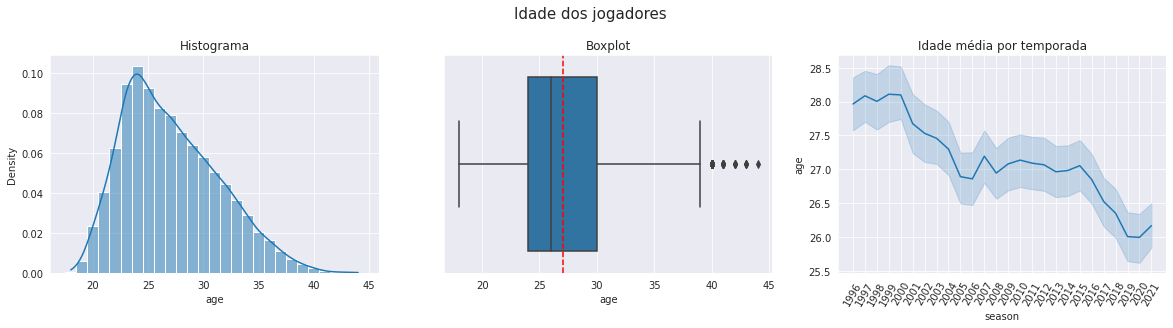

Média: 27.08451848841934, Desvio Padrão: 4.335867630839554


In [ ]:
fig = plt.figure(figsize=(20, 4))
fig.suptitle('Idade dos jogadores', fontsize=15, y=1.05)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='age', kde=True, discrete=True, stat='density')
plt.title('Histograma')
plt.subplot(1, 3, 2)
ax = sns.boxplot(data=df, x="age")
ax.axvline(df["age"].mean(), ls='--', color='r')
plt.title('Boxplot')
plt.subplot(1, 3, 3)
sns.lineplot('season', 'age', data = df)
plt.title('Idade média por temporada')
plt.xticks(rotation=60)
plt.show()
print(f'Média: {df["age"].mean()}, Desvio Padrão: {df["age"].std()}')

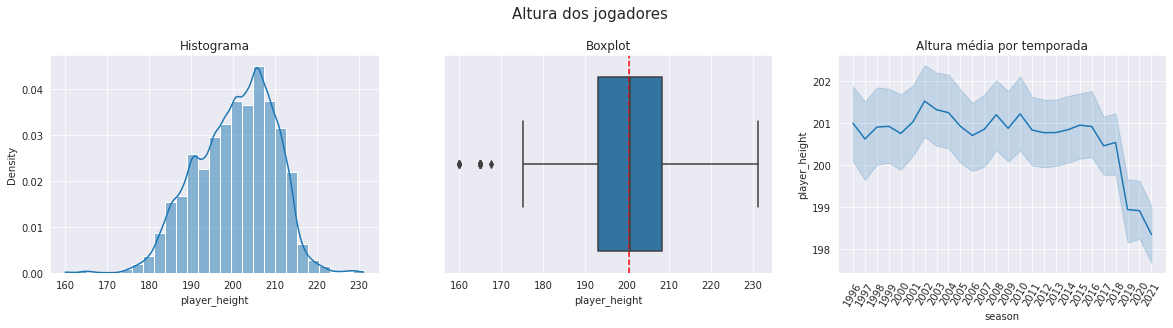

Média: 200.61160178789112, Desvio Padrão: 9.146320529958091


In [ ]:
fig = plt.figure(figsize=(20, 4))
fig.suptitle('Altura dos jogadores', fontsize=15, y=1.05)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='player_height', kde=True, stat='density', bins=27)
plt.title('Histograma')
plt.subplot(1, 3, 2)
ax = sns.boxplot(data=df, x="player_height")
ax.axvline(df["player_height"].mean(), ls='--', color='r')
plt.title('Boxplot')
plt.subplot(1, 3, 3)
sns.lineplot('season', 'player_height', data = df)
plt.title('Altura média por temporada')
plt.xticks(rotation=60)
plt.show()
print(f'Média: {df["player_height"].mean()}, Desvio Padrão: {df["player_height"].std()}')

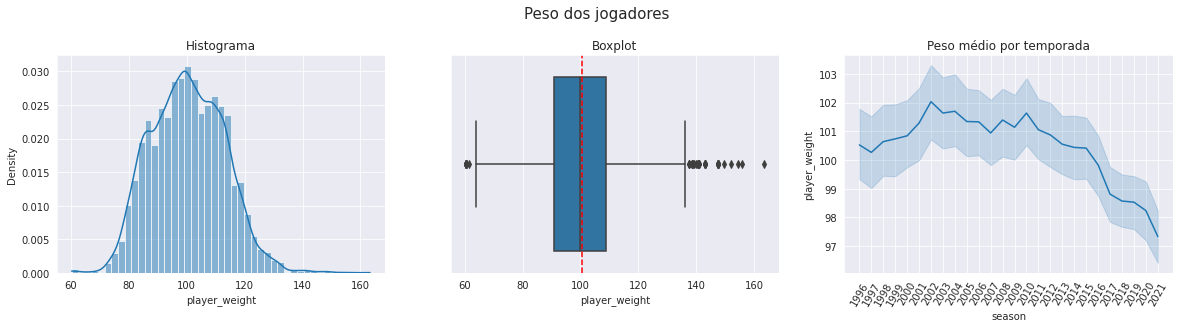

Média: 100.36992618155222, Desvio Padrão: 12.477149699854765


In [ ]:
fig = plt.figure(figsize=(20, 4))
fig.suptitle('Peso dos jogadores', fontsize=15, y=1.05)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='player_weight', kde=True, stat='density', bins=45)
plt.title('Histograma')
plt.subplot(1, 3, 2)
ax = sns.boxplot(data=df, x="player_weight")
ax.axvline(df["player_weight"].mean(), ls='--', color='r')
plt.title('Boxplot')
plt.subplot(1, 3, 3)
sns.lineplot('season', 'player_weight', data = df)
plt.title('Peso médio por temporada')
plt.xticks(rotation=60)
plt.show()
print(f'Média: {df["player_weight"].mean()}, Desvio Padrão: {df["player_weight"].std()}')

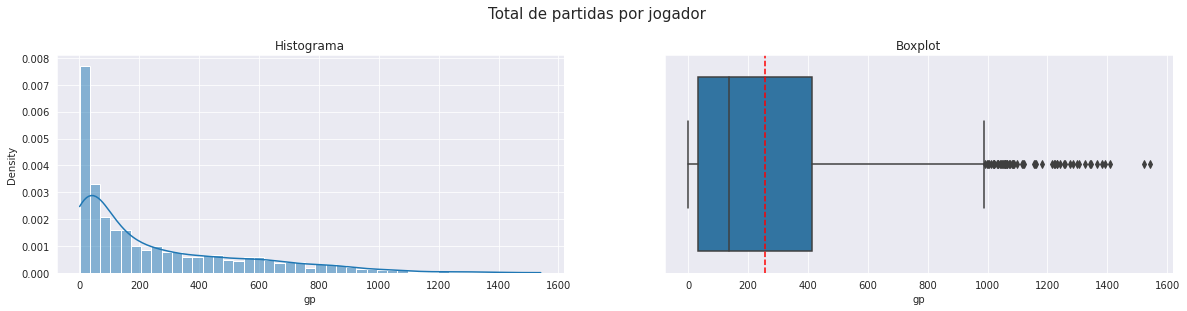

Média: 256.2444173771823, Desvio Padrão: 288.16027479977237


In [ ]:
pt_gp = df.pivot_table(index='player_name', values='gp', aggfunc='sum')
fig = plt.figure(figsize=(20, 4))
fig.suptitle('Total de partidas por jogador', fontsize=15, y=1.05)
plt.subplot(1, 2, 1)
sns.histplot(data=pt_gp, x='gp', kde=True, stat='density', bins=45)
plt.title('Histograma')
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=pt_gp, x="gp")
ax.axvline(pt_gp["gp"].mean(), ls='--', color='r')
plt.title('Boxplot')
plt.show()
print(f'Média: {pt_gp["gp"].mean()}, Desvio Padrão: {pt_gp["gp"].std()}')

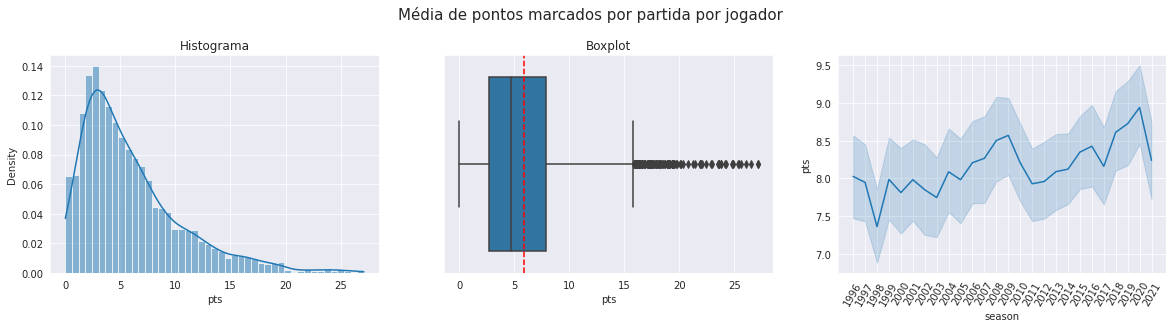

Média: 5.91814603639559, Desvio Padrão: 4.584490915704697


In [ ]:
pt_pts = df.pivot_table(index='player_name', values='pts', aggfunc='mean')
fig = plt.figure(figsize=(20, 4))
fig.suptitle('Média de pontos marcados por partida por jogador', fontsize=15, y=1.05)
plt.subplot(1, 3, 1)
sns.histplot(data=pt_pts, x='pts', kde=True, stat='density', bins=45)
plt.title('Histograma')
plt.subplot(1, 3, 2)
ax = sns.boxplot(data=pt_pts, x="pts")
ax.axvline(pt_pts["pts"].mean(), ls='--', color='r')
plt.title('Boxplot')
plt.subplot(1, 3, 3)
sns.lineplot('season', 'pts', data = df)
plt.xticks(rotation=60)
plt.show()
print(f'Média: {pt_pts["pts"].mean()}, Desvio Padrão: {pt_pts["pts"].std()}')

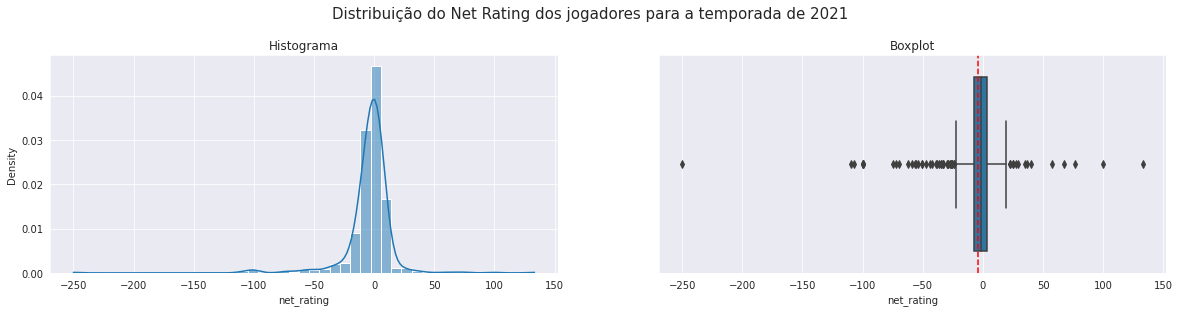

Média: -3.9831404958677687, Desvio Padrão: 21.0621473984697


In [ ]:
pt_nr = df[df['season']=='2021'].pivot_table(index='player_name', values='net_rating')
fig = plt.figure(figsize=(20, 4))
fig.suptitle('Distribuição do Net Rating dos jogadores para a temporada de 2021', fontsize=15, y=1.05)
plt.subplot(1, 2, 1)
sns.histplot(data=pt_nr, x='net_rating', kde=True, stat='density', bins=45)
plt.title('Histograma')
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=pt_nr, x="net_rating")
ax.axvline(pt_nr["net_rating"].mean(), ls='--', color='r')
plt.title('Boxplot')
plt.show()
print(f'Média: {pt_nr["net_rating"].mean()}, Desvio Padrão: {pt_nr["net_rating"].std()}')

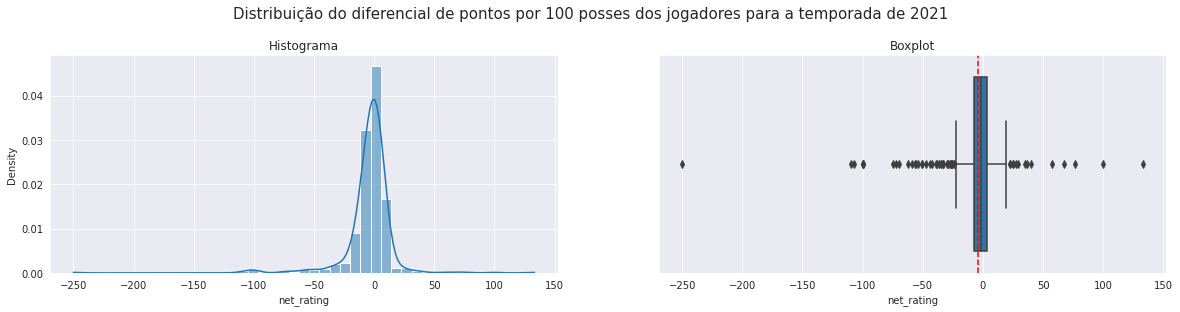

Média: -3.9831404958677687, Desvio Padrão: 21.0621473984697


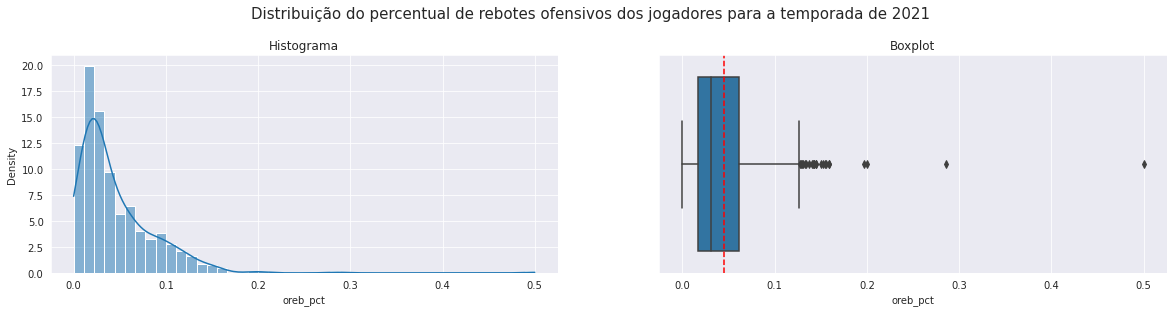

Média: 0.04464132231404958, Desvio Padrão: 0.04252146257721557


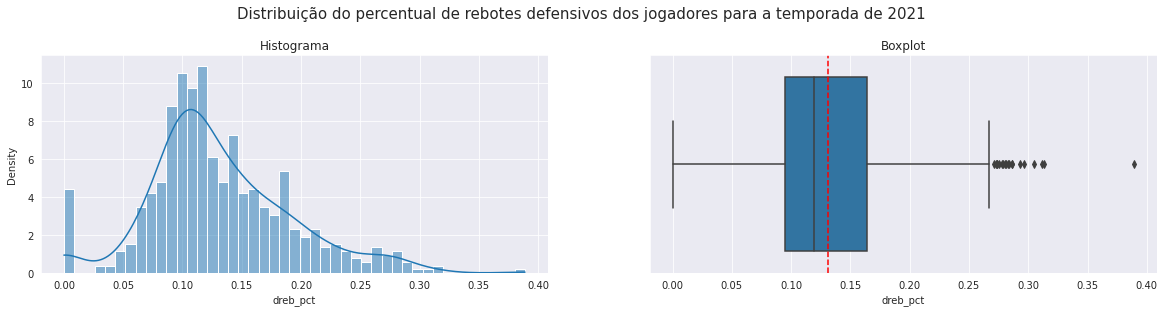

Média: 0.13096528925619833, Desvio Padrão: 0.06013195026087318


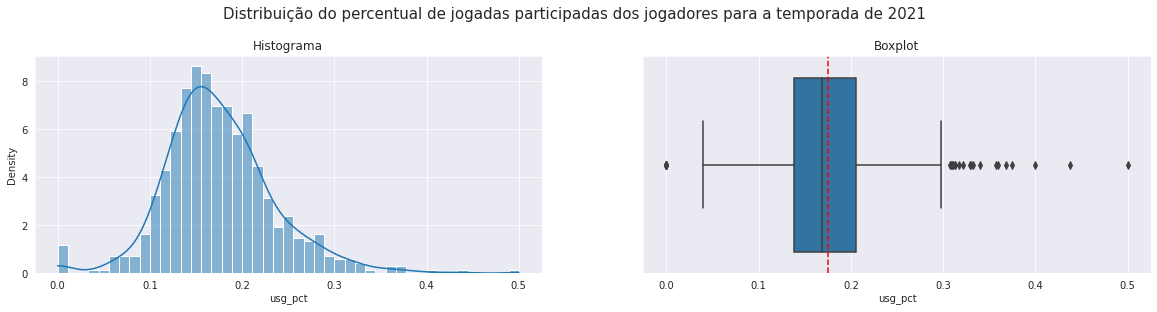

Média: 0.17543471074380165, Desvio Padrão: 0.06042335015125055


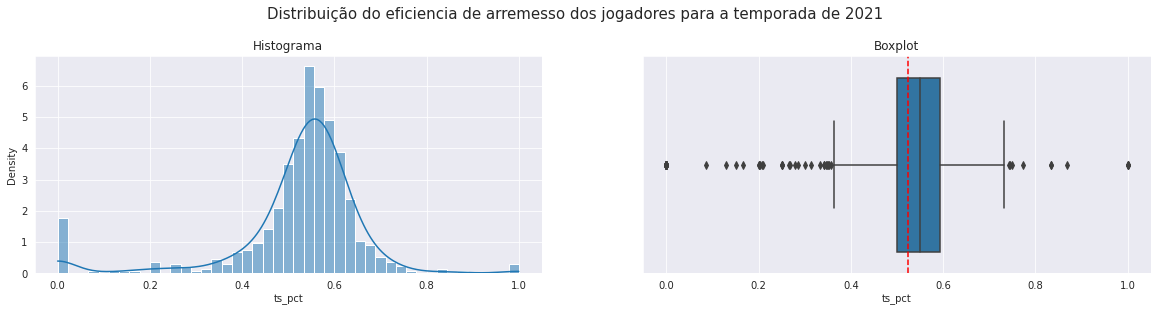

Média: 0.523786776859504, Desvio Padrão: 0.14531832775376427


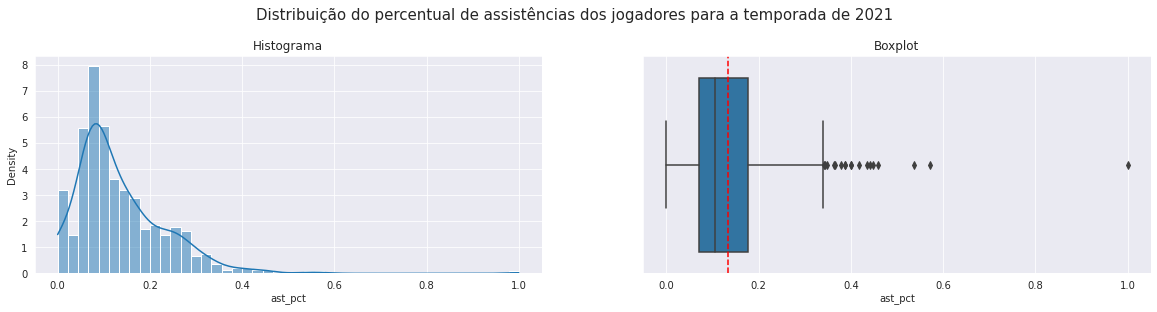

Média: 0.13386942148760328, Desvio Padrão: 0.09903090597505876


In [ ]:
columns = ['net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
nomes = ["diferencial de pontos por 100 posses", "percentual de rebotes ofensivos", "percentual de rebotes defensivos", "percentual de jogadas participadas", "eficiencia de arremesso", "percentual de assistências"]
for column,nome in zip(columns,nomes):
  pt_nr = df[df['season']=='2021'].pivot_table(index='player_name', values=column)
  fig = plt.figure(figsize=(20, 4))
  fig.suptitle(f'Distribuição do {nome} dos jogadores para a temporada de 2021', fontsize=15, y=1.05)
  plt.subplot(1, 2, 1)
  sns.histplot(data=pt_nr, x=column, kde=True, stat='density', bins=45)
  plt.title('Histograma')
  plt.subplot(1, 2, 2)
  ax = sns.boxplot(data=pt_nr, x=column)
  ax.axvline(pt_nr[column].mean(), ls='--', color='r')
  plt.title('Boxplot')
  plt.show()
  print(f'Média: {pt_nr[column].mean()}, Desvio Padrão: {pt_nr[column].std()}')

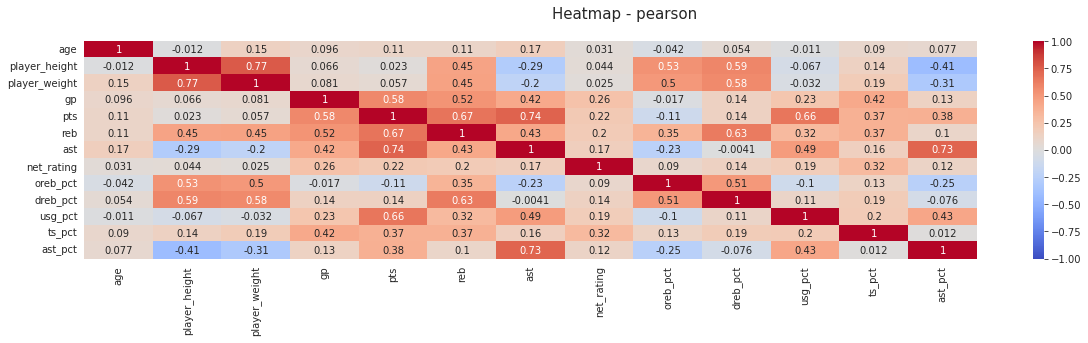

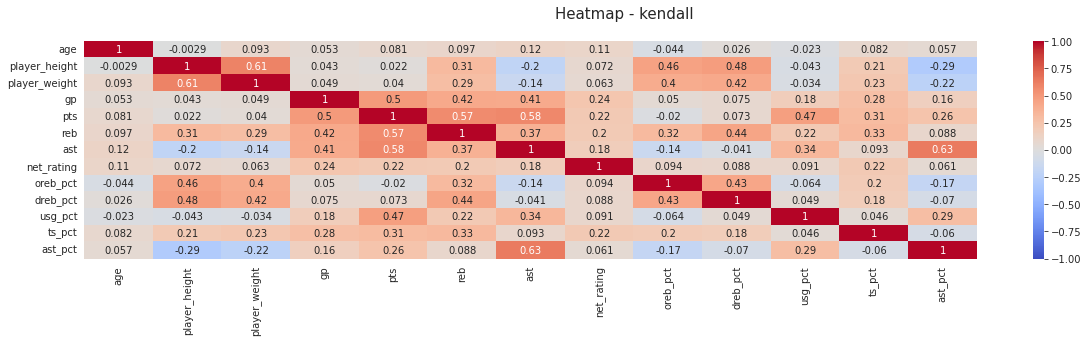

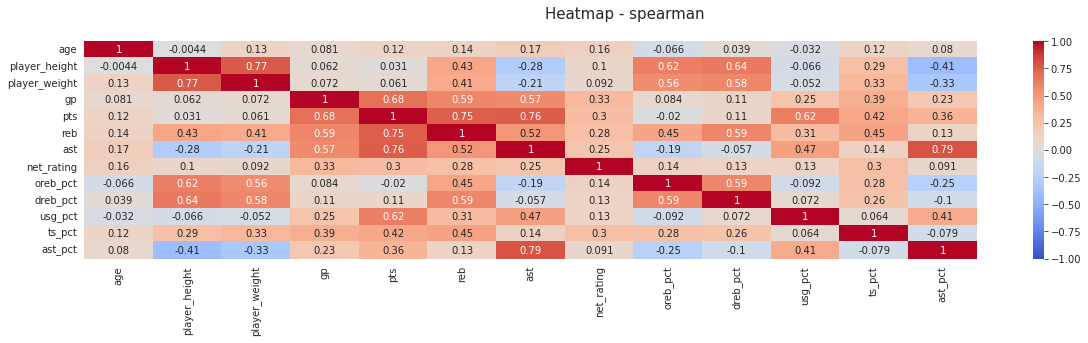

In [ ]:
metodos = ['pearson', 'kendall', 'spearman']
for metodo in metodos:
  fig = plt.figure(figsize=(20, 4))
  fig.suptitle(f'Heatmap - {metodo}', fontsize=15, y=1.00)
  sns.heatmap(df[df['season']=='2021'].corr(metodo), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
  plt.show()

## Jogadores mais altos, agarram mais rebotes ofensivos e ou defensivos?

Text(0.5, 1.0, 'Percentual de rebotes ofensivos x altura')

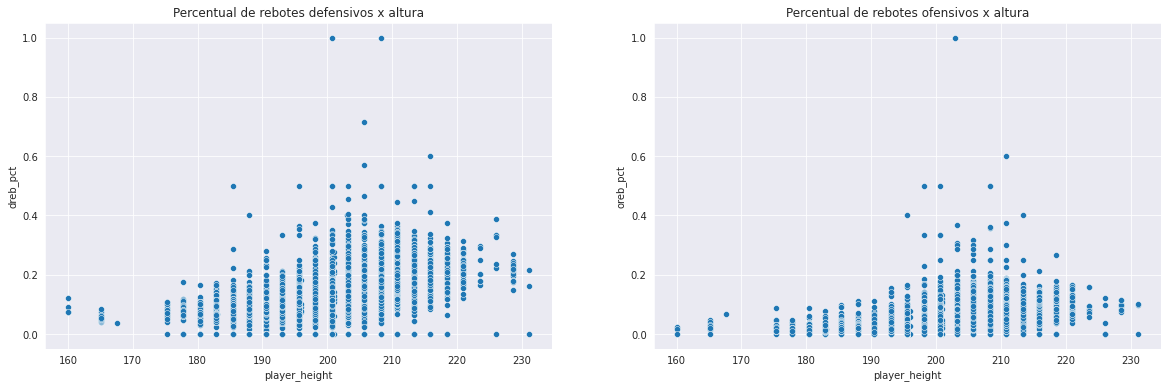

In [ ]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, y='dreb_pct', x='player_height')
plt.title('Percentual de rebotes defensivos x altura')
plt.subplot(1,2,2)
sns.scatterplot(data=df, y='oreb_pct', x='player_height')
plt.title('Percentual de rebotes ofensivos x altura')

In [ ]:
jog_altos = df['oreb_pct'][df['player_height'] > df['player_height'].quantile(0.50)]
jog_baixos = df['oreb_pct'][df['player_height'] <= df['player_height'].quantile(0.50)]
jog_altos_media = jog_altos.mean()
jog_altos_dp = jog_altos.std()
jog_baixos_media = jog_baixos.mean()
jog_baixos_dp = jog_baixos.std()
print(f"Jogadores altos: Maiores que {df['player_height'].quantile(0.50)}cms, {jog_altos.shape[0]} jogadores" )
print(f"Jogadores baixos: Menores que {df['player_height'].quantile(0.50)}cms, {jog_baixos.shape[0]} jogadores")
print(f'Aproveitamento de rebotes dos jogares com altura superior ao 3º quartil: Média: {jog_altos_media:.4f}, Desvio Padrão {jog_altos_dp:.4f}')
print(f'Aproveitamento de rebotes dos jogares com altura inferior ao 1º quartil: Média: {jog_baixos_media:.4f}, Desvio Padrão {jog_baixos_dp:.4f}')

Jogadores altos: Maiores que 200.66cms, 5980 jogadores
Jogadores baixos: Menores que 200.66cms, 6325 jogadores
Aproveitamento de rebotes dos jogares com altura superior ao 3º quartil: Média: 0.0804, Desvio Padrão 0.0432
Aproveitamento de rebotes dos jogares com altura inferior ao 1º quartil: Média: 0.0299, Desvio Padrão 0.0263


Teste de hipótese:

H0: Média_altos = Média_baixos

H1: Média_altos != Média_baixos

In [ ]:
stats.ttest_ind(jog_altos, jog_baixos, alternative='greater')

Ttest_indResult(statistic=78.7905770172105, pvalue=0.0)

Com um p-valor de 0.0, rejeitamos a hipótese nula de que a média do percentual de rebotes ofencivos aproveitados é a mesma entre os jogadores mais altos e os jogadores mais baixos

# Atividade 2 - PROBABILIDADE E INFERÊNCIA

In [ ]:
var = np.load("/content/values_squad2.npy")

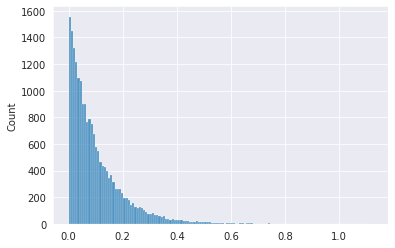

In [ ]:
sns.histplot(var)
plt.show()


In [ ]:
def hist(k, var, dist):
  interval = np.linspace(np.min(var),np.max(var),k)
  hist_amostra, bins = np.histogram(var, bins=interval)
  if dist == 'exp':
    #estimador parametro
    lamb = (var.shape[0] - 2)/sum(var)
    scale = 1/lamb
    cdf = stats.expon.cdf(interval, scale=scale)
  if dist == 'norm':
    #Estimadores para média e dp:
    media = var.mean()
    dp = var.std()
    cdf = stats.norm.cdf(interval, loc=media, scale=dp)
  area_bins = cdf[1:] - cdf[:-1]
  hist_frequencia_teorica = area_bins * var.shape[0]
  return hist_amostra, hist_frequencia_teorica 
  
def teste_aderencia(k, var, dist):
  chi_calc = np.sum((hist(k, var, dist)[1] - hist(k, var, dist)[0])**2/hist(k, var, dist)[1])
  chi_cut = stats.chi2.ppf(0.95,df= k - 1 - 1)
  return f'Hipótese nula rejeitada pois Chi calculado ({chi_calc}) > Chi de corte ({chi_cut})' if chi_calc > chi_cut else f'Hipótese nula não rejeitada pois Chi calculado ({chi_calc}) < Chi de corte ({chi_cut})'

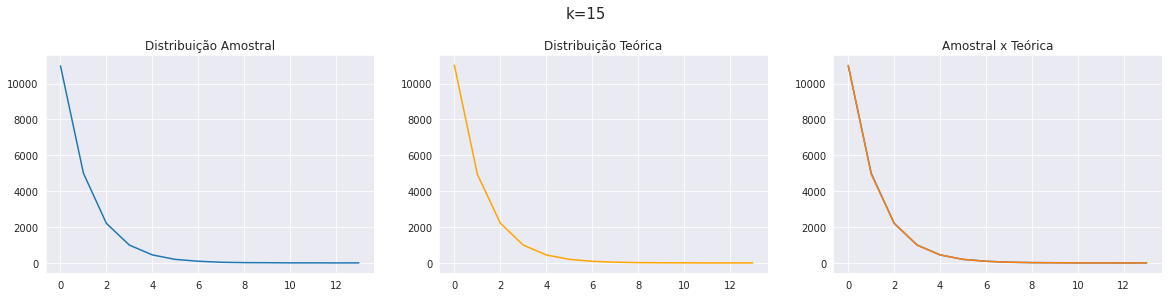

Hipótese nula não rejeitada pois Chi calculado (16.556313725230517) < Chi de corte (22.362032494826934)


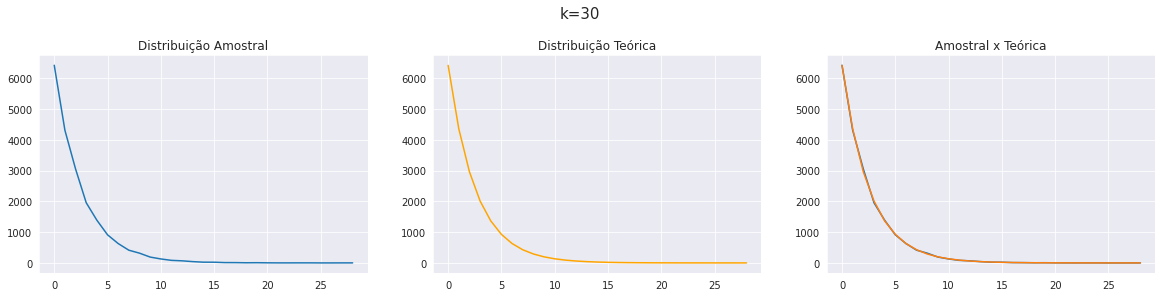

Hipótese nula não rejeitada pois Chi calculado (29.79777648129412) < Chi de corte (41.33713815142739)


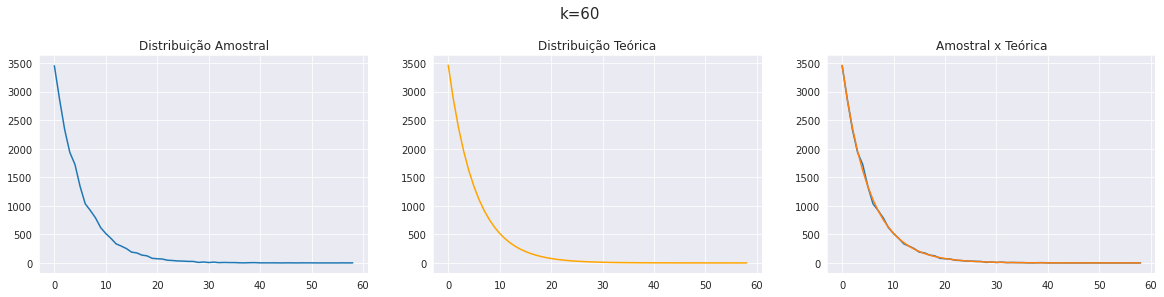

Hipótese nula não rejeitada pois Chi calculado (73.19237835016668) < Chi de corte (76.7778031560615)


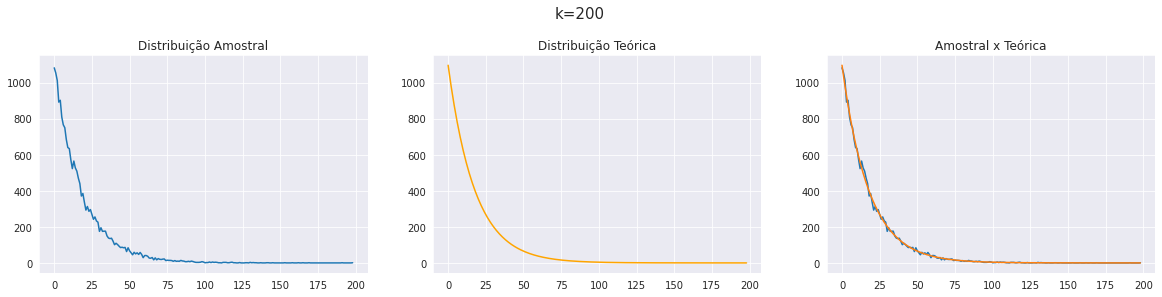

Hipótese nula rejeitada pois Chi calculado (266.5476639507933) > Chi de corte (231.82916671052752)


In [ ]:
for k in [15,30,60,200]: 
  fig = plt.figure(figsize=(20, 4))
  fig.suptitle(f'k={k}', fontsize=15, y=1.05)
  ax1 = plt.subplot(1, 3, 1)
  plt.plot(hist(k, var, dist='exp')[0])
  plt.title('Distribuição Amostral')
  ax2 = plt.subplot(1, 3, 2, sharey = ax1)
  plt.plot(hist(k, var, dist='exp')[1], color='orange')
  plt.title('Distribuição Teórica')
  ax3 = plt.subplot(1, 3, 3, sharey = ax1)
  plt.plot(hist(k, var, dist='exp')[0])
  plt.plot(hist(k, var, dist='exp')[1])
  plt.title('Amostral x Teórica')
  plt.show()
  print(teste_aderencia(k, var, dist='exp'))

# Atividade 3 - Series Temporais

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Dataset:
https://www.kaggle.com/datasets/antoniocgg/cofee-prices-real-dolar-1996-2022

In [ ]:
series_df = pd.read_csv('Caf_1996_2022v.csv', encoding='latin-1')

In [ ]:
serie = series_df[['Data','À vista US$']][series_df['Data'].str.contains('2021')]
serie['Data'] = pd.to_datetime(serie['Data'], format='%d/%m/%Y')
serie.set_index('Data', inplace=True)

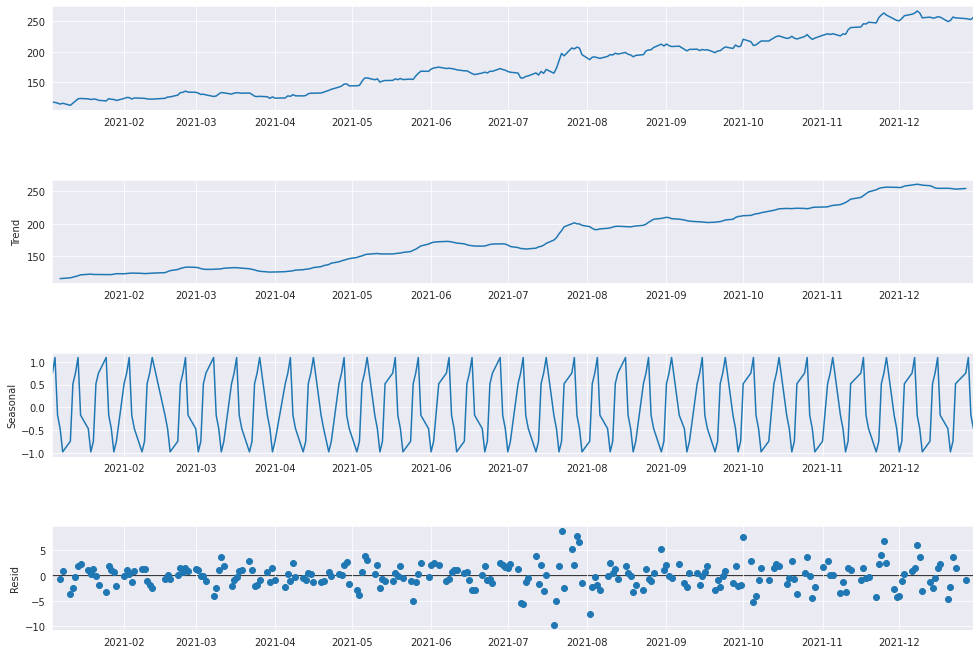

In [ ]:
result = seasonal_decompose(serie, model='additive',freq=7)
fig = result.plot()
fig.set_size_inches((15, 10))
plt.show()

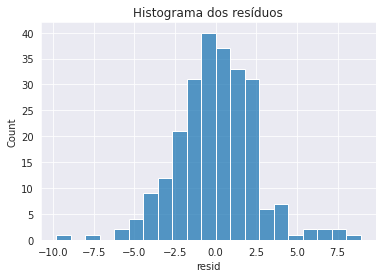

In [ ]:

sns.histplot(result.resid)
plt.title('Histograma dos resíduos')
plt.show()

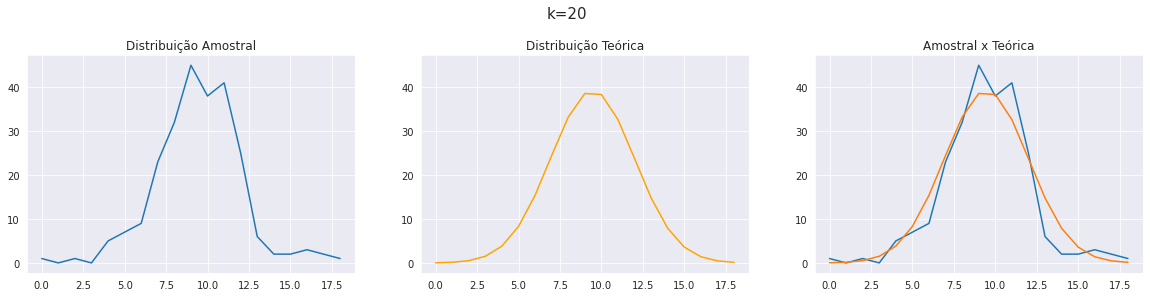

Hipótese nula rejeitada pois Chi calculado (56.972527266652776) > Chi de corte (28.869299430392623)


In [ ]:
k = 20
var = result.resid
media = result.resid.mean()
dp = result.resid.std()
fig = plt.figure(figsize=(20, 4))
fig.suptitle(f'k={k}', fontsize=15, y=1.05)
ax1 = plt.subplot(1, 3, 1)
plt.plot(hist(k,var, dist='norm')[0])
plt.title('Distribuição Amostral')
ax2 = plt.subplot(1, 3, 2, sharey = ax1)
plt.plot(hist(k,var, dist='norm')[1], color='orange')
plt.title('Distribuição Teórica')
ax3 = plt.subplot(1, 3, 3, sharey = ax1)
plt.plot(hist(k,var, dist='norm')[0])
plt.plot(hist(k,var, dist='norm')[1])
plt.title('Amostral x Teórica')
plt.show()
print(teste_aderencia(k, var, dist='norm'))